In [1]:
import numpy as np
from IPython.display import display, clear_output

In [2]:
w = [10.0 * (np.random.rand() -0.5), 10.0 * (np.random.rand() -0.5)]
b = 10.0*np.random.rand()
x = np.random.rand(64,2)
print(x.shape)
y = w[0] * x[:,0] + w[1] * x[:,1] + b + 0.1 * np.random.randn(64,)
print(y.shape)

(64, 2)
(64,)


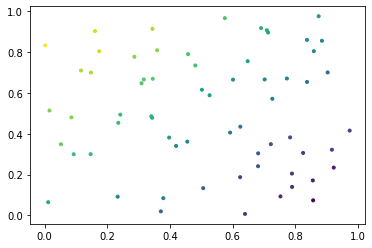

In [3]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0], x[:,1], marker='.',c=y)
plt.show()

In [4]:
print(w, b)

[-2.7084593644858246, 2.2729109907268388] 0.32964209946430123


In [5]:
class Linear:
    def __init__(self, lr=0.01, iters = 10, display = False):
        self.lr = lr
        self.iters = iters
        self.disp = display
        
        self.w = None
        self.b = None
        
        self.X = np.arange(0, 1, 0.01).reshape((-1,1))

    def fit(self, x,y):
        
        if self.disp:
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1) 
    
        n, d = x.shape
        
        self.w = np.zeros((1,d))
        self.b = 0 #np.mean(y)
    
        for i in range(self.iters):
            # L = (yhat - y)^2 = (wx +b - y)^2
            # dL/dw = 2(wx + b - y) * x
            # dL/db = 2(wx + b - y)
            
            dLdw = 2 * np.mean((np.matmul(x, self.w.T) + self.b - np.expand_dims(y, -1)) * x, 0)
            # print(dLdw.shape)
            dLdb = 2 * np.mean(np.matmul(x, self.w.T) + self.b - np.expand_dims(y, -1))
            
            self.w -= self.lr * dLdw
            self.b -= self.lr * dLdb
            
            # Y = self.predict(X)
            
            if self.disp:
                ax.cla()
                ax.plot(x,y,'.')
                ax.plot(X,Y,'r')
                display(fig)    
                clear_output(wait = True)
                plt.pause(0.001)
            
    def predict(self,x):
        return np.matmul(x, self.w.T) + self.b

In [6]:
clf = Linear(lr = .1, iters=10000, display = False)

In [7]:
clf.fit(x,y)
print(clf.w, clf.b)

[[-2.71904769  2.21844502]] 0.38373281066679854


(100, 2)


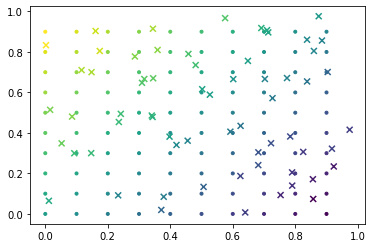

In [8]:
# X = np.arange(0, 1, 0.01).reshape((-1,1))
_x, _y = np.meshgrid(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
X = np.vstack([_x.ravel(), _y.ravel()]).T
print(X.shape)
Y = clf.predict(X)

plt.scatter(X[:,0], X[:,1], marker='.',c=Y)
plt.scatter(x[:,0], x[:,1], marker='x',c=y)

#plt.plot(x,y,'.')
#plt.plot(X,Y,'r')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
clf_ = LinearRegression()
clf_.fit(x,y)

LinearRegression()

In [10]:
print(clf_.coef_)

[-2.71904769  2.21844502]


In [11]:
print(clf_.intercept_)

0.3837328106668146
